In [6]:
import json, requests
import h5py
from numpy import *
import healpy as hp
import tdpy_util
import matplotlib.pyplot as plt

# plotting
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sns.set(context='poster', style='dark', color_codes=True)


In [7]:
def query(lon, lat, coordsys='gal', mode='full'):
    
    url = 'http://argonaut.skymaps.info/gal-lb-query-light'
    
    payload = {'mode': mode}
    
    if coordsys.lower() in ['gal', 'g']:
        payload['l'] = lon
        payload['b'] = lat
    elif coordsys.lower() in ['equ', 'e']:
        payload['ra'] = lon
        payload['dec'] = lat
    else:
        raise ValueError("coordsys '{0}' not understood.".format(coordsys))
    
    headers = {'content-type': 'application/json'}
    
    r = requests.post(url, data=json.dumps(payload), headers=headers)
    
    try:
        r.raise_for_status()
    except requests.exceptions.HTTPError as e:
        print('Response received from Argonaut:')
        print(r.text)
        raise e
    
    return json.loads(r.text)

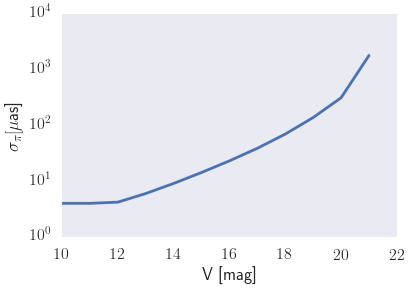

In [10]:
%matplotlib inline
magv = arange(10, 22)
prlxerrr = array([4., 4., 4.2, 6.0, 9.1, 14.3, 23.1, 38.8, 69.7, 138., 312., 1786.])

fig, ax = plt.subplots()
ax.plot(magv, prlxerrr)
ax.set_ylabel(r'$\sigma_\pi [\mu$as]')
ax.set_xlabel('V [mag]')
ax.set_yscale('log')
plt.show()

In [ ]:
nside = 256
maxmgang = 10.
lghp, bghp, nside, npixl, apix = tdpy_util.get_heal(nside) 
mpixl = where((abs(lghp) < maxmgang) & (abs(90. - bghp) < maxmgang))[0]

qresult = query(list(lghp[mpixl]), list(bghp[mpixl]))
for key in qresult.keys():
    fig, ax = plt.subplots()
    ax.hist(qresult[key], 100)
    ax.set_title(key)
    plt.show()

qresult = query(list(lghp[mpixl]), list(bghp[mpixl]), mode='sfd')
for key in qresult.keys():
    fig, ax = plt.subplots()
    ax.hist(qresult[key])
    ax.set_title(key)
    plt.show()
    
qresult = query(list(lghp[mpixl]), list(bghp[mpixl]), mode='lite')
for key in qresult.keys():
    fig, ax = plt.subplots()
    ax.hist(qresult[key])
    ax.set_title(key)
    plt.show()
